Between the text will be code such as the `import` statements below. Please note that the code is just there to support some graphs and numbers. You don't have to understand it to read the text so it can safely be ignored. 

If there's something important happening in code then this will be made clear by the text surrounding it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotutils as pu
%matplotlib inline

# complex numbers (are not complex)
As humans needed to solve more and more complex equations we had to move away from *whole numbers* through *rational numbers* arriving at a class of numbers that are nowadays mostly called **complex numbers**. 

These numbers are also sometimes known as **imaginary numbers** which is actually a bit of misnomer because these numbers are just as real as any other number and they are essential to a solving a huge number of problems in science. In fact, the complex moniker is kinda stupid as well. They are not complex at all. Just a bit unconventional.

Before we explain complex numbers in more detail it might be useful and take a step back and see why we need them in the first place. We'll sidetrack a bit with *square roots* and *square numbers* get some concepts in place before we get to the really funky stuff.

# the square root
One of the more nasty operations in math is taking the square root of a number. In fact, even before complex numbers people ran into problems with this operation due to the fact [how it's defined](https://en.wikipedia.org/wiki/Square_root):

> In mathematics, a square root of a number $a$ is a number $y$ such that $y^2 = a$, in other words, a number $y$ whose square (the result of multiplying the number by itself, or $y \times y$) is $a$.

As usual, the definition is correct but hard to understand if you're not used to the lingo and format of these things. As an aside, naming one of the variables $a$ doesn't increase the readability of the definition.

Another definition might be:

> Given the hypervolume of some object $P$ in $n$ dimensions and given a hypercube $Q$ in the same $n$ dimensions. What length does each side of the hypercube do we need to represent the volume of 

In math, the square root of a number $x$ is written as $\sqrt{x}$ and the easiest way to understand it is with some examples:

$$
\begin{align}
1 \times 1 = 1 & \implies \sqrt{1} = 1 \\
2 \times 2 = 4 & \implies \sqrt{4} = 2 \\
3 \times 3 = 9 & \implies \sqrt{9} = 3 \\
\cdots \\
x \times x = x^2 & \implies \sqrt{x^2} = x
\end{align}
$$

In the table above we can see that if we take some number $x$ and multiply it with itself we get $x \times x$ which in math is usually written as $x^2$ ($x$ squared). We can also see that if we proceed to take the square root of some number $x^2$ we get back the original number $x$. 

In other words, it is the *inverse* of *squaring* a number (multiplying a number with itself). However just by this very definition we get into strange territory very quickly. As long as we are dealing with squares such as $x \times x$ the world is wonderful and we can be sure that any square root we want to find is an *integer* (whole number) just by the way how the operation is defined.

### squared?
Especially in the old times but even today when doing exploratory stuff it's not uncommon to look at things from a *geometric* perspective. Which basically means we try to to think about shapes. When we are dealing with what seemingly is only one dimension it's often useful to look at it from a two-dimensional point of view. Also we can try to understand things by *mapping* them to less dimensions. 

# square numbers
So what is a *square number* anyway? If we look at it from a geometric perspective we can say that a square is in fact a rectangle where both sides are equal. Now this is a bit of a recursive definition because we might as well say a rectangle is a square scaled along some kind of axis but lets stick with our basic explanation for now. We know that we can compute the *area* of a rectangle by multiplying its width $x$ and height $y$. So $area = x \times y$. 

Now if we consider a number as being some kind of measurement for an abstract *area* we can say that a square number is a number such that we can write $area = x \times y = x \times x = y \times y\implies x = y$ where $area$ is just some number. Which in geometric terms means that some kind of area can either be defined by $x \times y$ (the width times height) or by $x \times x$ (width times width) and that this *implies* that $x$ is equal to $y$. Or in other words, both sides are equal and we're dealing with a square.

This square might be anything, it's not important, after all, with this definition the number $4$ is a square. It's a square of $2 \times 2$ and what it actually represents even in this abstract form is too much to answer in this essay. It can be anything, the important fact is the property that it can be written as a *factor* of two numbers that are the same. 

### factor?
A factor is basically when we take a thing and break it up in other using multiplication. So for example if we take $4$ we can factor this into $2 \times 2$ or $1 \times 4$ and we can say that $1$, $2$ and $4$ *are factors* of $4$. More generaly we can say that if a number $x$ can be represented with $n$ and $m$ so that $n \times m = x$ then this number $x$ has factors $n$ and $m$.

So how would we plot square roots? One way is just to plot a graph but we can do something a bit more *geometric*. We can plot square roots (and any root as it turns out) as a rectangle as well.

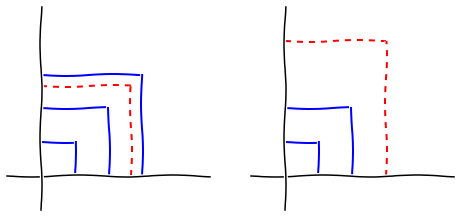

In [2]:
def plot_rect(ax, p, fmt='b'):
    x, y = p
    ax.plot([0, x], [y, y], fmt) # horizontal line
    ax.plot([x, x], [0, y], fmt) # vertical line

with plt.xkcd():
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    for ax in axes: pu.setup_axes(ax, xlim=(-1, 5), ylim=(-1, 5), tickdirection='out')
    for p in [(1, 1), (2, 2), (3, 3)]: plot_rect(axes[0], p)
    plot_rect(axes[0], (2+2/3, 2+2/3), 'r--')
    for p in [(1, 1), (2, 2)]: plot_rect(axes[1], p)
    plot_rect(axes[1], (3, 4), 'r--')

We can clearly see all the *easy* roots of $x = 1, 2, 3, \ldots$ but how do our other points compare? In the first case we are between $2$ and $3$ and our width equals our height so $x = y$ and this is still managable but in the second case, how do we find a cube that is the size of a $3 \times 4$ rectangle?

# taking square roots
So now that we have some concepts out of the we way we can look at the square root operation from a slightly different perspective and ask another question:

> Assuming that number $x$ represents an area, how big does my square needs to be to be so its area equals $x$.

This is actually not that easy to answer (without invoking roots) and as such taking square roots is a bit of a funky operation. One thing is that it is somewhat hard for to do for humans. Another thing is that there are actually some people who might argue some square root numbers don't even exist because there is no way to write them down without involving the square root itself. We're not even considering *cube roots* and/or higher here but we should be able to see that finding some kind of number that can be multiplied with itself to make up *any* kind number is somewhat tricky.

### perspective: not squares
After all this talk of squares we could also look at it from a non-square perspective. Let's say we measure a rectangle of $3 \times 4$. It's area would be $3 \times 4 = 12$. Now we walk over to someone and request that we get a square that represents this area. So we request $\sqrt{12}$. It would not be unreasonable to be unable to comply because there isn't much more reasonable ways to write $\sqrt{12}$ in a different way.

Now of course there are exceptions but for the average human finding the square root of some number is not something they can just do. There are various methods in order to get us close but that's the point, we can never ever really get to some actual number with these things. Take for example $\sqrt{2}$ which we'll look at in more detail later. We simply cannot simplify this anymore without losing precision. We cannot write it as a rational number like $\frac{2}{3}$ either. It's just a number that if we would try to write it down as a decimal we would just have to decide to stop somewhere because it has an infinite amount of decimals.

### calculating square roots manually
There's lots of ways to calculate square roots manually and I'm not even sure if the way I'm about to describe is in any way an "official" or even good way but it does make the operation easy to understand if we keep considering a number as some kind of area.

Let's get back to our square of $3 \times 4$ and see if we can figure this out. There's a huge plot incoming but don't worry about it. It's not important to the problem we are trying to figure out, just focus on the graphs below.

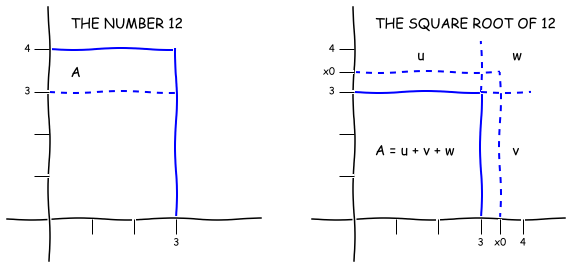

In [3]:
with plt.xkcd():
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    for ax in axes: pu.setup_axes(ax, xlim=(-1, 5), ylim=(-1, 5), tickdirection='out')
    plot_rect(axes[0], (3, 4), 'b')
    axes[0].plot([0, 3], [3, 3], 'b--')
    axes[0].yaxis.set_ticks([1, 2, 3, 4])
    axes[0].xaxis.set_ticks([1, 2, 3])
    axes[0].yaxis.set_ticklabels(['', '', '3', '4'])
    axes[0].xaxis.set_ticklabels(['', '', 3])
    axes[0].annotate('THE NUMBER 12', (0.5, 4.5))
    axes[0].annotate('A', (0.5, 3.35))
    plot_rect(axes[1], (3, 3), 'b')
    plot_rect(axes[1], (3.461, 3.461), 'b--')
    axes[1].plot([3, 3], [3, 4.2], 'b--')
    axes[1].plot([3, 4.2], [3, 3], 'b--')
    axes[1].yaxis.set_ticks([1, 2, 3, 3.461, 4])
    axes[1].xaxis.set_ticks([1, 2, 3, 3.461, 4])
    axes[1].xaxis.set_ticklabels(['', '', '3', 'x0', '4'])
    axes[1].yaxis.set_ticklabels(['', '', '3', 'x0', '4'])
    axes[1].annotate('THE SQUARE ROOT OF 12', (0.5, 4.5))
    axes[1].annotate('u', (1.5, 3.75))
    axes[1].annotate('w', (3.75, 3.75))
    axes[1].annotate('v', (3.75, 1.5))
    axes[1].annotate('A = u + v + w', (0.5, 1.5))

Remember, when we ask for a square root we are basically looking for a square that has an area equal to the number we give. Except this time we started with a non-square number. The area of our triangle is $3 \times 4 = 12$. This is the number that is represented on the left, on the right is a square representing the answer we are looking for: $\sqrt{12}$.

Let's start on the left side and take a look at the area $A$. We can see that: 

$A = 3 \times (4 - 3) = 3 \times 1 = 3 \implies A = 3$.

From a geometric perspective we can see that if we want to calculate the biggest possible square we need to look at the shortest side of the rectangle. We can also imagine this holds up for a cube in three dimensions and our guts may tell us it will hold up for any shape in $n$ dimensions. We'll bother with this in a moment though. 

For now let's focus on a bit on the right-hand plot. We have this number $x_0 - 3$ which is interesting. Logically we can deduce that in order to produce a square we need to add $(x_0 - 3) \times 3$ to each side. So that's two times that quantity which is $2 \times (x_0 - 3) \times 3$. And then we are left with this little square in the corner and this is just $(x_0 - 3) \times (x_0 - 3) = (x_0 - 3)^2$. 

Writing it all out we have:

$A = (x_0 - 3)^2 + (x_0 - 3) \times 3 + (x_0 - 3) \times 3 = (x_0 - 3)^2 + 2 \times 3 \times (x_0 - 3) = (x_0 - 3)^2 + 6 \times (x_0 - 3) = 3$.

What we're really interested in is this number $x_0 - 3$ whatever it might end up to be. And things are getting a bit unwieldly so let's just say $x = (x_0 - 3)$ and we might be able to rewrite this in a more friendly form.

$A = x^2 + 3x + 3x = 3 = x^2 + 6x$

### calculating the biggest possible square
We easily see that the biggest square we can make is $3 \times 3$ but is there a way to calculate this instead? If we have a number 12. What *is* the biggest actual square we can make where the side length is an integer number. Well we *know* that $\sqrt{9} = 3$ so that's the square we are looking for. The next integer square is $4 \times 4$ and that's too big. The number we are looking for is $3$ but how can we figure this out. 

Our rectangle is $3 \times 4$ and the square we are looking for is $3 \times 3$ or $3^2$. It seems that given a rectangle, the number we are looking for is the short side. But if we only know an area things are a bit harder, suppose we are only given the number $12$ and we know it's the area of a rectangle but not it's dimensions. The next question we could ponder is, does it even matter for the final outcome?

# sandbox
Everything below is just for playing around and should be deleted or cleaned-up for final publishing.

### sanity check on calculating $\sqrt{12}$

Even though this is jjust a sanity check this is a pretty awesome curve if we consider what it is doing geometrically. How do the negative values even make sense?

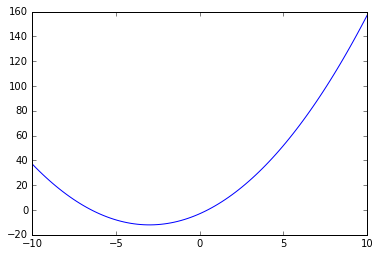

In [4]:
# this is the solution we found involing sqrt(12)
f = lambda x: x**2 + 6*x - 3 
x = np.linspace(-10, 10, 100)
# let's plot it for sanity
plt.plot(x, f(x))

In [5]:
x = 0.46410 # this is our manually calculated value of dx/spread
print(round((x**2) + (x*6) - 3, 2))
print(3 + x)
print(round(np.sqrt(12), 4))

-0.0
3.4641
3.4641
